In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data.csv')
df.head()


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:

df_cleaned = df.dropna(subset=['Engine Fuel Type', 'Number of Doors']) # Dropping rows with missing values in 'Engine Fuel Type' and 'Number of Doors'


df_cleaned['Engine HP'].fillna(df_cleaned['Engine HP'].median(), inplace=True) # Filling missing values in 'Engine HP' and 'Engine Cylinders' with the median
df_cleaned['Engine Cylinders'].fillna(df_cleaned['Engine Cylinders'].median(), inplace=True)

df_cleaned.drop(columns=['Market Category'], inplace=True)
# Drop the 'Market Category' column due to a high number of missing values


df_cleaned.isnull().sum()


<ipython-input-3-077bfc3781c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Engine HP'].fillna(df_cleaned['Engine HP'].median(), inplace=True)
<ipython-input-3-077bfc3781c0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Engine Cylinders'].fillna(df_cleaned['Engine Cylinders'].median(), inplace=True)
<ipython-input-3-077bfc3781c0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned.drop(columns=['M

,0
Make,0
Model,0
Year,0
Engine Fuel Type,0
Engine HP,0
Engine Cylinders,0
Transmission Type,0
Driven_Wheels,0
Number of Doors,0
Vehicle Size,0


In [ ]:

df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

df_encoded.head()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,26,19,3916,46135,False,False,...,False,False,True,False,False,False,False,False,False,False
1,2011,300.0,6.0,2.0,28,19,3916,40650,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2011,300.0,6.0,2.0,28,20,3916,36350,False,False,...,False,False,True,False,False,False,False,False,False,False
3,2011,230.0,6.0,2.0,28,18,3916,29450,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2011,230.0,6.0,2.0,28,18,3916,34500,False,False,...,True,False,False,False,False,False,False,False,False,False


Top correlations with MSRP:
 MSRP                                            1.000000
Engine HP                                       0.661130
Engine Cylinders                                0.532771
Engine Fuel Type_premium unleaded (required)    0.457156
Model_Veyron 16.4                               0.453680
Make_Bugatti                                    0.453680
Make_Lamborghini                                0.320852
Make_Maybach                                    0.308789
Model_Landaulet                                 0.289314
Make_Bentley                                    0.272000
Name: MSRP, dtype: float64

Least correlations with MSRP:
 Vehicle Style_Extended Cab Pickup   -0.070690
Make_Dodge                          -0.071256
Vehicle Style_Regular Cab Pickup    -0.075581
Vehicle Style_4dr Hatchback         -0.075585
Number of Doors                     -0.126585
Transmission Type_MANUAL            -0.132321
city mpg                            -0.162786
highway MPG         

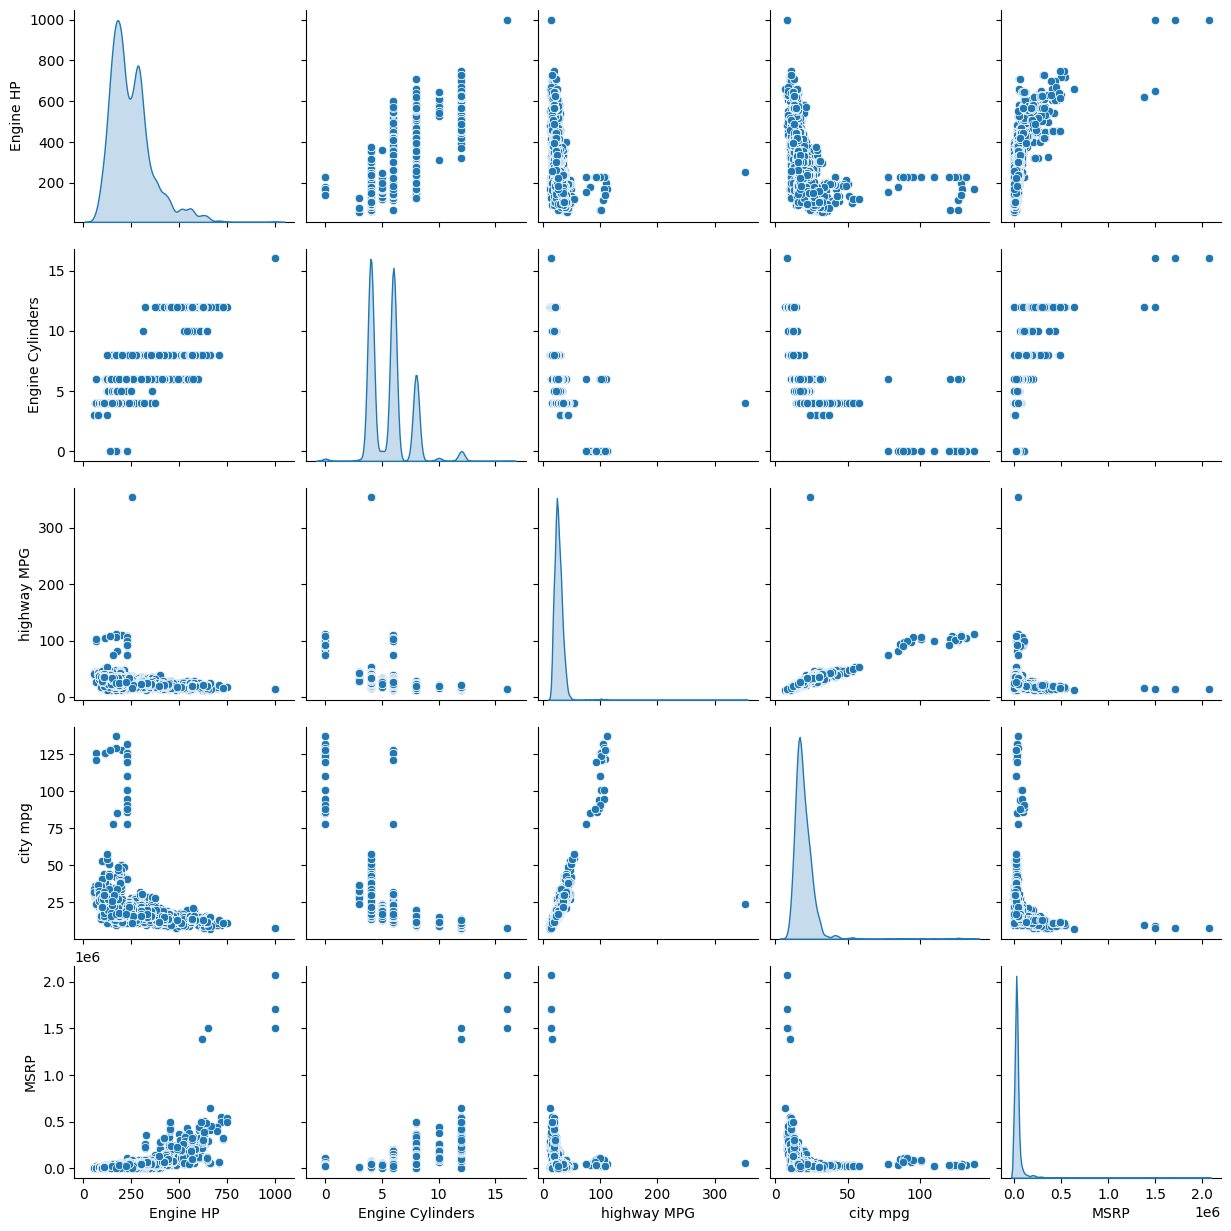

In [ ]:

correlation_matrix = df_encoded.corr()


target_corr = correlation_matrix['MSRP'].sort_values(ascending=False)

################################## Display the top correlations
print("Top correlations with MSRP:\n", target_corr.head(10))
print("\nLeast correlations with MSRP:\n", target_corr.tail(10))
# Select a subset of features for visualization
selected_features = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg', 'MSRP']

sns.pairplot(df_encoded[selected_features], diag_kind='kde')
plt.show()


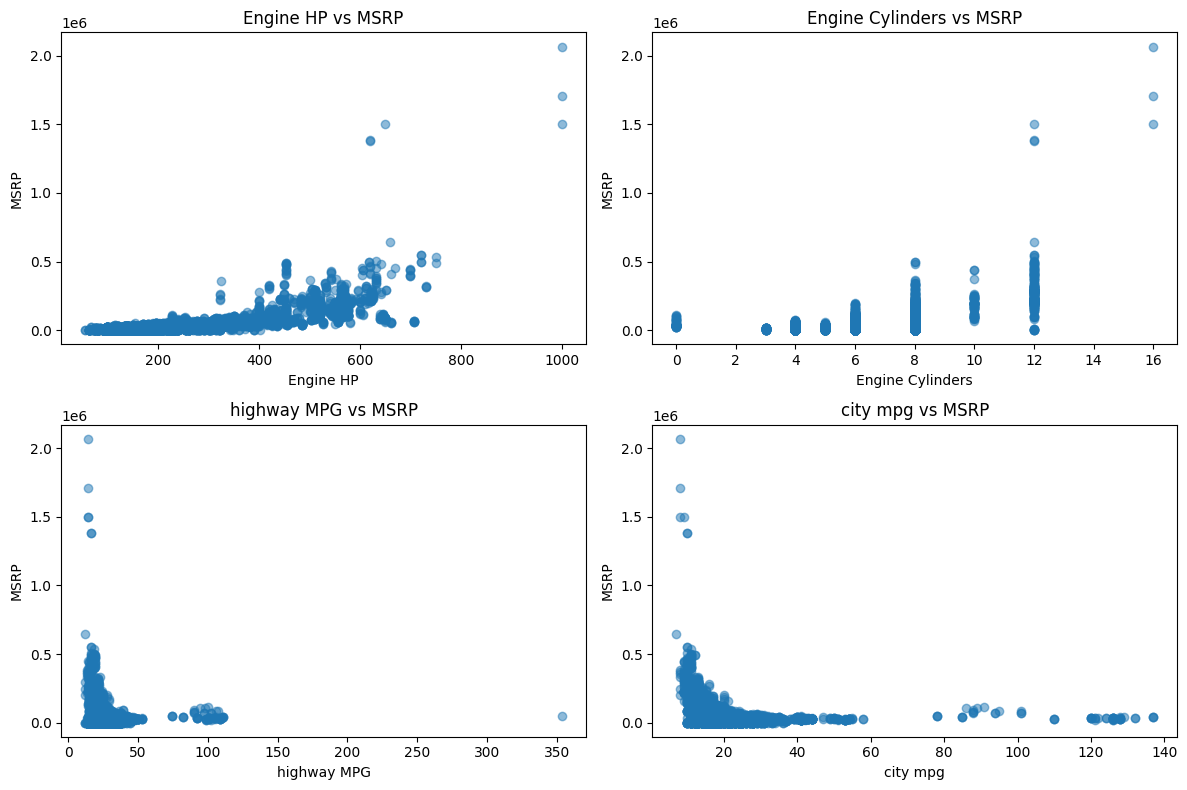

In [ ]:

features_to_plot = ['Engine HP', 'Engine Cylinders', 'highway MPG', 'city mpg']

############################################ Plotting scatter plots for each feature against MSRP
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i+1)
    plt.scatter(df_encoded[feature], df_encoded['MSRP'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('MSRP')
    plt.title(f'{feature} vs MSRP')

plt.tight_layout()
plt.show()



In [ ]:
# Define the dependent variable (target) and independent variables (features)
X = df_encoded.drop(columns=['MSRP'])  # Features
y = df_encoded['MSRP']  # Target


In [ ]:
from sklearn.model_selection import train_test_split

######################################### Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print(f"Training data: {X_train.shape}, Testing data: {X_test.shape}")


Training data: (9524, 1001), Testing data: (2381, 1001)


In [ ]:
from sklearn.linear_model import LinearRegression

################################ Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [  585.98889308   132.54193247  -179.22619841 ... -1867.02274922
 -3796.09377139 -3500.05873702]
Model intercept: -1119508.836843667


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

############################## Prediction on the test set
y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 176567146.20099357
R-squared: 0.9459595294562709


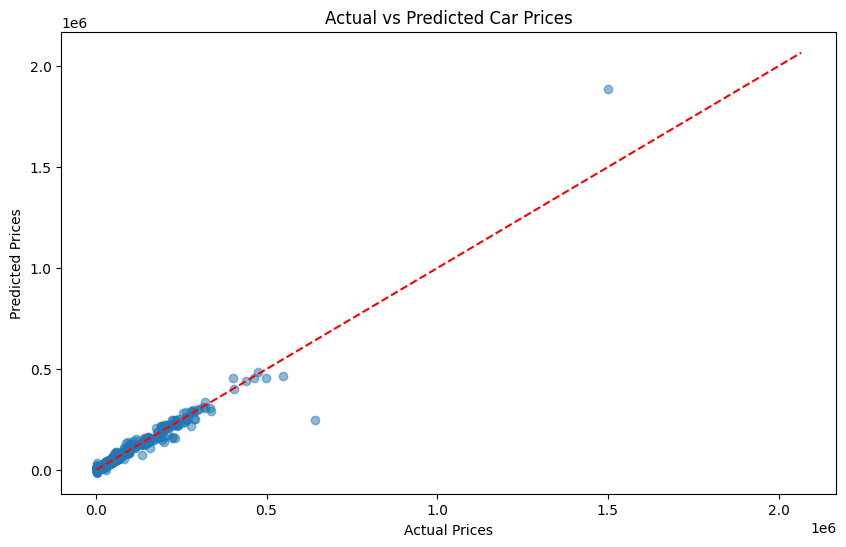

In [ ]:
################################ PLotting actual and predicted value
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.show()
